In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
shap_accuracy_drop={"IE": 0.8, "NS": 0.96, "TF": 0.79, "JP": 0.75}
lime_accuracy_drop={"IE": 0.77, "NS": 0.87, "TF": 0.58, "JP": 0.84}
shap_accuracy_increase={"IE": 0.41, "NS": 0.42, "TF": 0.36, "JP": 0.28}
lime_accuracy_increase={"IE": 0.4,"NS": 0.5,"TF": 0.5,"JP": 0.44}

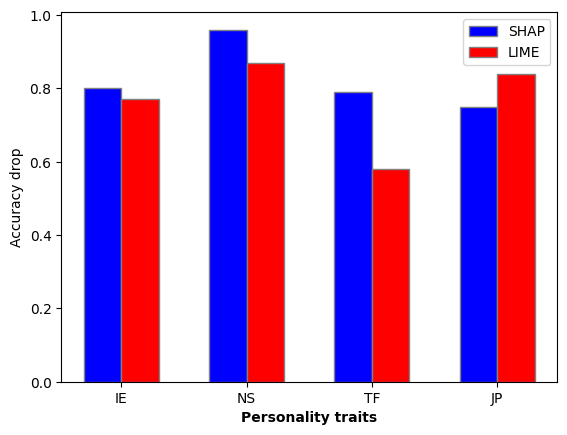

In [3]:
# plot the accuracy drop
fig, ax = plt.subplots()
barWidth = 0.3
r1 = np.arange(len(shap_accuracy_drop))
r2 = [x + barWidth for x in r1]
plt.bar(r1, shap_accuracy_drop.values(), color='b', width=barWidth, edgecolor='grey', label='SHAP')
plt.bar(r2, lime_accuracy_drop.values(), color='r', width=barWidth, edgecolor='grey', label='LIME')
plt.xlabel('Personality traits', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(shap_accuracy_drop))], shap_accuracy_drop.keys())
plt.ylabel('Accuracy drop')
plt.legend()
plt.show()

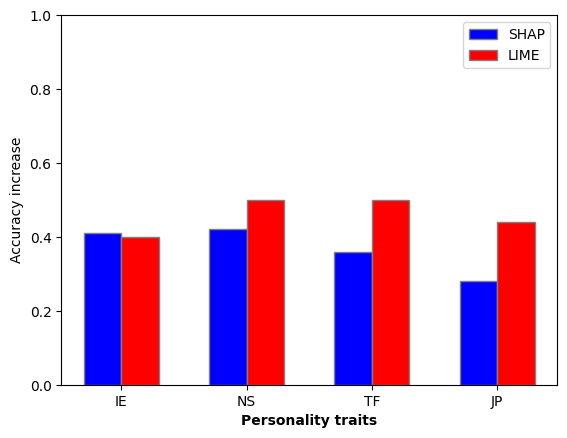

In [11]:
# plot the accuracy increase as a bar chart
fig, ax = plt.subplots()
barWidth = 0.3
r1 = np.arange(len(shap_accuracy_increase))
r2 = [x + barWidth for x in r1]
plt.bar(r1, shap_accuracy_increase.values(), color='b', width=barWidth, edgecolor='grey', label='SHAP')
plt.bar(r2, lime_accuracy_increase.values(), color='r', width=barWidth, edgecolor='grey', label='LIME')
plt.xlabel('Personality traits', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(shap_accuracy_increase))], shap_accuracy_increase.keys())
# set max value for y-axis
max_value = 1
plt.ylim(0, max_value)
plt.ylabel('Accuracy increase')
plt.legend()
plt.show()

